<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#問1.11" data-toc-modified-id="問1.11-1">問1.11</a></span></li><li><span><a href="#問1.12" data-toc-modified-id="問1.12-2">問1.12</a></span></li><li><span><a href="#問1.13" data-toc-modified-id="問1.13-3">問1.13</a></span></li><li><span><a href="#問1.14" data-toc-modified-id="問1.14-4">問1.14</a></span></li><li><span><a href="#問1.15" data-toc-modified-id="問1.15-5">問1.15</a></span></li><li><span><a href="#問1.16" data-toc-modified-id="問1.16-6">問1.16</a></span><ul class="toc-item"><li><span><a href="#(-i-)-95%信頼区間" data-toc-modified-id="(-i-)-95%信頼区間-6.1">( i ) 95%信頼区間</a></span></li><li><span><a href="#(-ii-)" data-toc-modified-id="(-ii-)-6.2">( ii )</a></span></li></ul></li></ul></div>

# 問1.11

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_11 = pd.DataFrame( {
    "y" : [673, 690, 503, 870, 612, 595, 920, 671, 536, 615, 485, 806, 512, 656, 621, 718, 517, 890, 423, 778, 736, 362],
    "x" : [527, 731, 425, 853, 620, 516, 872, 638, 585, 627, 477, 763, 545, 603, 585, 574, 483, 821, 327, 704, 640, 317]
})
df_11

,y,x
0,673,527
1,690,731
2,503,425
3,870,853
4,612,620
5,595,516
6,920,872
7,671,638
8,536,585
9,615,627


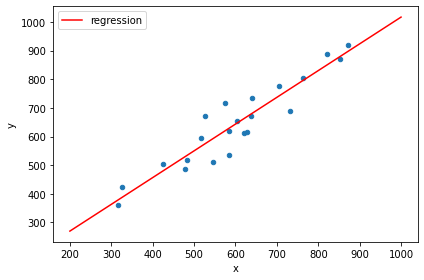

傾き 0.9342420178551362
切片 83.00797171468105


In [23]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(df_11[["x"]].values, df_11["y"])

x_test = np.linspace(200, 1000, 100).reshape(-1,1)

fig, axes = plt.subplots()
df_11.plot("x", "y", kind="scatter", ax=axes)
axes.plot(x_test, slr.predict(x_test), color="red", label="regression")

axes.legend()

plt.tight_layout()
plt.show()

print("傾き", slr.coef_[0])
print("切片", slr.intercept_)

# 問1.12

In [28]:
df_12 = pd.DataFrame({
    "y" : [276, 328, 329, 368, 340, 280, 360, 365, 340, 338, 326, 334, 375, 475, 406, 348, 331, 360, 346, 372],
    "x" : [132, 136, 147, 159, 140, 144, 165, 159, 150, 149, 143, 135, 157, 154, 155, 145, 155, 156, 140, 150]
})
df_12

,y,x
0,276,132
1,328,136
2,329,147
3,368,159
4,340,140
5,280,144
6,360,165
7,365,159
8,340,150
9,338,149


In [31]:
df_12.corr()

,y,x
y,1.000000,0.561042
x,0.561042,1.000000


# 問1.13

In [39]:
df_13 = pd.DataFrame({
    "y" : [46.9, 45.0, 44.0, 43.8, 42.4, 41.6, 40.3, 39.0, 38.5, 37.9, 38.1, 37.1, 36.6, 35.5, 34.6, 34.2, 33.4, 33.1,],
    "x" : [86, 97, 111, 115, 129, 155, 191, 212, 245, 289, 320, 368, 436, 517, 603, 710, 790, 907]
})

df_13["log10"] = np.round(np.log10(df_13["x"]), 2)
df_13

,y,x,log10
0,46.9,86,1.93
1,45.0,97,1.99
2,44.0,111,2.05
3,43.8,115,2.06
4,42.4,129,2.11
5,41.6,155,2.19
6,40.3,191,2.28
7,39.0,212,2.33
8,38.5,245,2.39
9,37.9,289,2.46


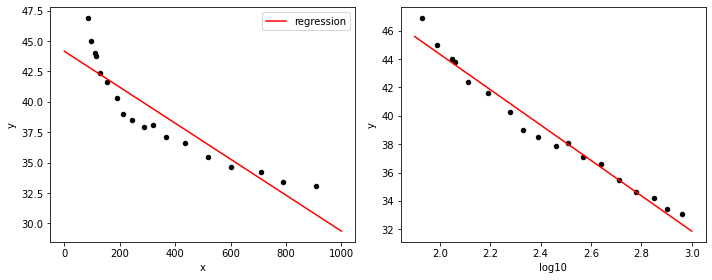

線形 >>>
	 傾き -0.014798101863888028
	 切片 44.16371543372671
対数 >>>
	 傾き -12.478531874481687
	 切片 69.30203490186636


In [72]:
from sklearn.linear_model import LinearRegression

# linear
slr = LinearRegression()
slr.fit(df_13[["x"]].values, df_13["y"])

# log10
slr_log10 = LinearRegression()
slr_log10.fit(df_13[["log10"]].values, df_13["y"])



fig = plt.figure(figsize=(10,4))

axes = plt.subplot(1,2, 1)
x_test = np.linspace(0, 1000, 100).reshape(-1,1)
df_13.plot("x", "y", kind="scatter", ax=axes, color="black")
axes.plot(x_test, slr.predict(x_test), color="red", label="regression")
axes.legend()

axes = plt.subplot(1,2, 2)
x_test = np.linspace(1.9, 3, 10).reshape(-1,1)
df_13.plot("log10", "y", kind="scatter", ax=axes, color="black")
axes.plot(x_test, slr_log10.predict(x_test), color="red", label="regression")

plt.tight_layout()
plt.show()

print("線形 >>>")
print("\t 傾き", slr.coef_[0])
print("\t 切片", slr.intercept_)

print("対数 >>>")
print("\t 傾き", slr_log10.coef_[0])
print("\t 切片", slr_log10.intercept_)

In [74]:
df_13.corr()

,y,x,log10
y,1.000000,-0.908208,-0.986726
x,-0.908208,1.000000,0.954940
log10,-0.986726,0.954940,1.000000


# 問1.14

In [77]:
df_14 = pd.DataFrame({
    "y"   : [43, 62, 15, 23, 84, 90, 67, 45, 75, 13, 56, 86, 24, 18, 52, 80, 70, 32, 37, 50, 60, 72],
    "x1" : [35, 44, 20, 32, 70, 76, 58, 37, 85, 10, 52, 62, 30, 22, 60, 50, 92, 38, 45, 46, 63, 43],
    "x2" : [50, 50, 10, 15, 88, 90, 82, 52, 92, 15, 58, 83, 24, 20, 46, 72, 63, 25, 30, 55, 59, 70],
    "x3" : [55, 70, 32, 45, 80, 92, 54, 45, 60, 25, 73, 89, 60, 32, 42, 86, 76, 17, 25, 73, 73, 72]
})
df_14

,y,x1,x2,x3
0,43,35,50,55
1,62,44,50,70
2,15,20,10,32
3,23,32,15,45
4,84,70,88,80
5,90,76,90,92
6,67,58,82,54
7,45,37,52,45
8,75,85,92,60
9,13,10,15,25


In [80]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(df_14[["x1", "x2", "x3"]], df_14["y"])

print(slr.coef_)
print(slr.intercept_)

[0.17629428 0.6169147  0.23466395]
-1.9500486838142024


In [83]:
df_14["Y"] = slr.intercept_ + slr.coef_[0] * df_14["x1"] + slr.coef_[1] * df_14["x2"] + slr.coef_[2] * df_14["x3"]
df_14[["y", "Y"]].corr()

,y,Y
y,1.000000,0.973929
Y,0.973929,1.000000


# 問1.15

In [88]:
import pandas as pd
import numpy as np

df_15 = pd.DataFrame( {
    "y" : [22, 36, 24, 22, 27, 29, 26, 23, 31, 24, 23, 27, 31, 25, 23],
    "x1" : [28, 46, 39, 25, 34, 29, 38, 23, 42, 27, 35, 39, 38, 32, 25],
    "x2" : [146, 169, 160, 156, 161, 168, 154, 153, 160, 152, 155, 154, 157, 162, 142],
    "x3" : [34, 57, 48, 38, 47, 50, 54, 40, 62, 39, 46, 54, 57, 53, 32],
})
df_15

,y,x1,x2,x3
0,22,28,146,34
1,36,46,169,57
2,24,39,160,48
3,22,25,156,38
4,27,34,161,47
5,29,29,168,50
6,26,38,154,54
7,23,23,153,40
8,31,42,160,62
9,24,27,152,39


In [90]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(df_15[["x1", "x2", "x3"]], df_15["y"])

print(slr.coef_)
print(slr.intercept_)

[0.20137689 0.17102457 0.12494278]
-13.217298316378507


In [91]:
df_15["Y"] = slr.intercept_ + slr.coef_[0] * df_15["x1"] + slr.coef_[1] * df_15["x2"] + slr.coef_[2] * df_15["x3"]
df_15[["y", "Y"]].corr()

,y,Y
y,1.000000,0.831474
Y,0.831474,1.000000


# 問1.16
## ( i ) 95%信頼区間

In [92]:
df_16 = pd.DataFrame({
          "x" :  [73, 63, 31, 24, 79, 84, 32, 33, 66, 36], 
          "y" : [37, 27, 18, 11, 39, 40, 14, 18, 28, 17]},
)
df_16

,x,y
0,73,37
1,63,27
2,31,18
3,24,11
4,79,39
5,84,40
6,32,14
7,33,18
8,66,28
9,36,17


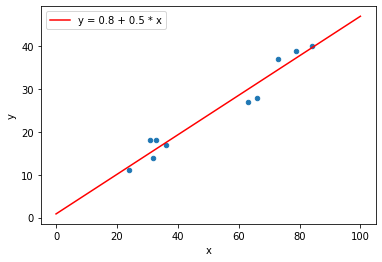

In [113]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(df_16[["x"]], df_16["y"])

# 回帰係数
a_hat_0 = slr.intercept_
a_hat_1 = slr.coef_[0]

fig, axes = plt.subplots()
x_test = np.linspace(0, 100, 100).reshape(-1, 1)

df_16.plot("x", "y", kind="scatter", ax=axes)
axes.plot(x_test, slr.predict(x_test), color="red", label="y = {} + {} * x".format(round(a_hat_0, 1), round(a_hat_1, 1)))

axes.legend()
plt.show()

In [119]:
n = len(df_16["x"])
sxx = df_16["x"].var()
xbar = df_16["x"].mean()
syy = df_16["y"].var()
sxy = df_16.cov().iloc[1, 0]

ve =  n * (syy - sxy**2/sxx) / (n-2)

from scipy.stats import t as student

print("信頼区間 >> a1 ")
print(a_hat_1 - student.ppf(1-0.05/2, n-2)  * np.sqrt(ve / n / sxx ) )
print(a_hat_1 + student.ppf(1-0.05/2, n-2) * np.sqrt(ve / n / sxx ) )

信頼区間 >> a1 
0.3831637212148661
0.540104178383274


In [120]:
print("信頼区間 >> a0")
print(a_hat_1 - student.ppf(1-0.05/2, n-2)  * np.sqrt(ve *  1/n  + xbar**2/ sxx ) )
print(a_hat_1 + student.ppf(1-0.05/2, n-2) * np.sqrt(ve *  1/n  + xbar**2/ sxx ) )

信頼区間 >> a0
-5.068675416992384
5.991943316590524


## ( ii ) 